## Import necessary libraries

In [301]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Set Options

In [302]:
np.set_printoptions(suppress=True)

## Make Bandit Class

In [303]:
class Bandit:
    def __init__(self, p=None):
        self.p = p if p else random.random()
        self.times_succeeded = 0
        self.times_chosen = 0
        self.success_ratio = 0
    
    def choose(self):
        self.times_chosen += 1
        result = random.random() < self.p
        if result:
            self.times_succeeded += 1
        
        self.success_ratio = self.times_succeeded / self.times_chosen
        return result
    
    def reset(self):
        self.times_succeeded = 0
        self.times_chosen = 0
        self.success_ratio = 0

## Constant variables

In [304]:
BANDITS = 10
MODES = 6
bandits = [Bandit() for _ in range(BANDITS)]
labels = ['epsilon', 'linear', '1/t', 'exponential', 'exponential 2', 'inverse']
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'cyan'] 

## Implementation of epsilon greedy

In [305]:
def epsilon_greedy(bandits, n, init_epsilon, plot=True, mode=0):
    diff = [sum([abs(bandit.p - bandit.success_ratio) for bandit in bandits])]
    for t in range(1, n + 1):
        # e
        if mode == 0:
            epsilon = init_epsilon
        # linear
        elif mode == 1: 
            epsilon = init_epsilon * ((n - t) / n)
        # 1 / t
        elif mode == 2: 
            epsilon = init_epsilon * (1 / t)
        # exponential
        elif mode == 3:
            alpha = 0.95
            epsilon = init_epsilon * (alpha ** (t))
        # exponential 2
        elif mode == 4:
            landa = 0.05
            epsilon = init_epsilon * (math.e ** (-landa * t))
        # inverse
        elif mode == 5:
            alpha = 0.05
            epsilon = init_epsilon / (1 + alpha * t)
        p = random.random()
        if p < epsilon:
            selected_bandit = random.choice(bandits)
        else:
            selected_bandit = sorted(bandits, key=lambda x: x.success_ratio, reverse=True)[0]
        selected_bandit.choose()
        diff.append(sum([abs(bandit.p - bandit.success_ratio) for bandit in bandits]))
    # print(diff[-1])
    if plot:
        plt.xlabel("iterations")
        plt.ylabel("difference until perfection")
        plt.plot(range(len(diff)), diff, label=labels[mode], color=colors[mode], linewidth=1)
    # plt.scatter(range(len(diff)), diff, color='red', alpha=0.6, s=20)

## Compare epsilon greedy algorithm with constant epsilon and decaying epsilon

In [306]:
def compare_epsilon(bandits, epsilon, plot=True, modes=range(MODES)):
    results = []
    for mode in modes:
        for bandit in bandits:
            bandit.reset()
        epsilon_greedy(bandits, 1000000, epsilon, plot, mode)
        results.append(((sum([bandit.times_succeeded for bandit in bandits]) / (sorted(bandits, key=lambda x: x.success_ratio, reverse=True)[0].p * sum([bandit.times_chosen for bandit in bandits]))) * 100))
    # [99.1, 98, 50, 30, 20, 5] for epsilon
    return results

## Comparing results for epsilon set to 5% over 1 Million iterations

In [307]:
# compare_epsilon(bandits, 0.05, modes=[0,1,2,3,4,5])
# plt.legend(loc='upper right')
# plt.show()

## Experiment with different epsilons

In [308]:
results = [[] for _ in range(MODES)]
for epsilon_percent in range(0, 101, 5):
    result = compare_epsilon(bandits, epsilon_percent, plot=False)
    for mode in range(MODES):
        results[mode].append(result[mode])
    print(f"done checking epsilon percent {epsilon_percent:3}")

done checking epsilon percent   0
done checking epsilon percent   5
done checking epsilon percent  10
done checking epsilon percent  15
done checking epsilon percent  20
done checking epsilon percent  25
done checking epsilon percent  30
done checking epsilon percent  35
done checking epsilon percent  40
done checking epsilon percent  45
done checking epsilon percent  50
done checking epsilon percent  55
done checking epsilon percent  60
done checking epsilon percent  65
done checking epsilon percent  70
done checking epsilon percent  75
done checking epsilon percent  80
done checking epsilon percent  85
done checking epsilon percent  90
done checking epsilon percent  95
done checking epsilon percent 100


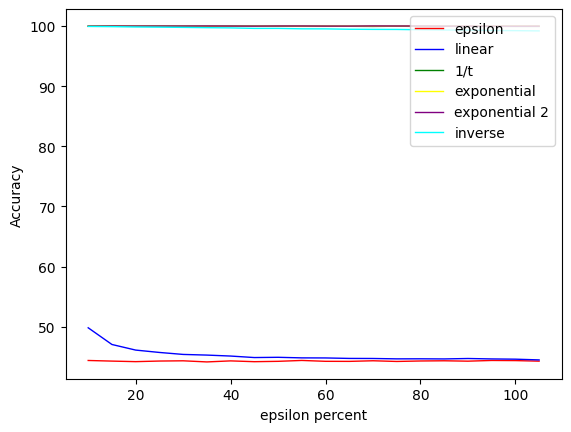

In [309]:
plt.xlabel("epsilon percent")
plt.ylabel("Accuracy")
for mode in range(MODES):
    plt.plot([5*i for i in range(1, len(results[mode]) + 1)][1:], results[mode][1:], label=labels[mode], color=colors[mode], linewidth=1)
plt.legend(loc='upper right')
plt.show()

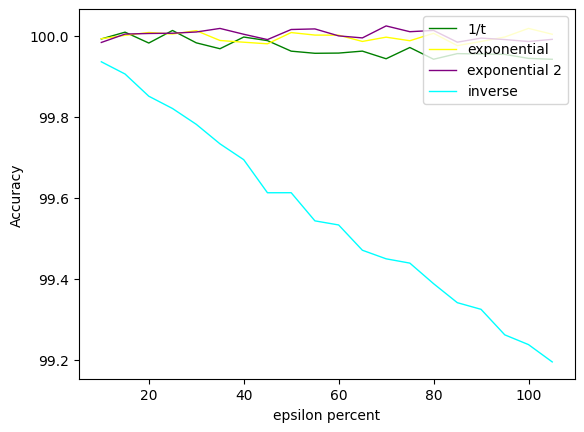

In [310]:
plt.xlabel("epsilon percent")
plt.ylabel("Accuracy")
for mode in range(2, MODES):
    plt.plot([5*i for i in range(1, len(results[mode]) + 1)][1:], results[mode][1:], label=labels[mode], color=colors[mode], linewidth=1)
plt.legend(loc='upper right')
plt.show()

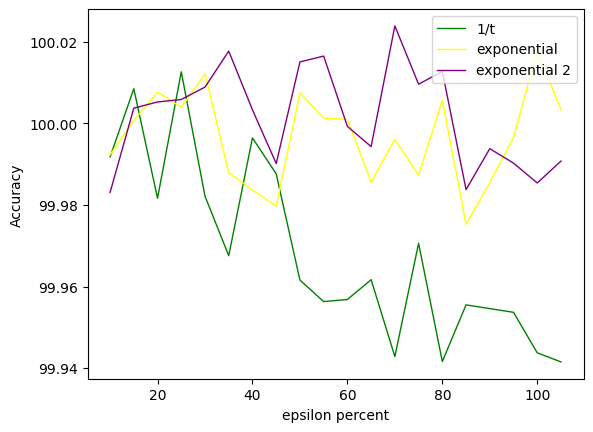

In [311]:
from matplotlib.ticker import ScalarFormatter
plt.xlabel("epsilon percent")
plt.ylabel("Accuracy")
for mode in range(2, MODES - 1):
    plt.plot([5*i for i in range(1, len(results[mode]) + 1)][1:], results[mode][1:], label=labels[mode], color=colors[mode], linewidth=1)
plt.legend(loc='upper right')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

### Result
- Decaying Epsilon is always better than constant epsilon
- depending on hyperparameters, exponential ways can be the greatest choices